<a href="https://colab.research.google.com/github/FelixSnz/Cursos/blob/main/MachineLearningPython/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importación de librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import sklearn

In [2]:
#importacion de datos externos
data = pd.read_csv("iris.data")

#Creación codificador para posteriormente codificar 
encoder = sklearn.preprocessing.LabelEncoder()

#registro de los nombres de las clases y atributos
classes = np.array(['setosa','versicolor','virginica'])
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [3]:
#Extracción de dos atributos al arreglo X
X = np.array(data[['sl','sw']])

#codificacion del las clases en formato texto a númerico
y = encoder.fit_transform(data['class'])

#creacion de arreglos de entrenamiento y testeo
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [4]:
n_neighbors = 15 #hiperparametro K

#creación, entrenamiento y evaluación del modelo
model = KNeighborsClassifier(n_neighbors)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print('acc: ', acc)
predicted = model.predict(x_test)

#imprimir las comparaciones entre las clases reales y las predicciones
for x in range(len(predicted)):
    print("Predicted: ", classes[predicted[x]], ' | ', "Actual: ", classes[y_test[x]])


acc:  0.7333333333333333
Predicted:  setosa  |  Actual:  setosa
Predicted:  virginica  |  Actual:  virginica
Predicted:  setosa  |  Actual:  setosa
Predicted:  virginica  |  Actual:  virginica
Predicted:  versicolor  |  Actual:  versicolor
Predicted:  virginica  |  Actual:  versicolor
Predicted:  virginica  |  Actual:  versicolor
Predicted:  virginica  |  Actual:  virginica
Predicted:  virginica  |  Actual:  virginica
Predicted:  versicolor  |  Actual:  versicolor
Predicted:  virginica  |  Actual:  virginica
Predicted:  versicolor  |  Actual:  virginica
Predicted:  virginica  |  Actual:  versicolor
Predicted:  setosa  |  Actual:  setosa
Predicted:  setosa  |  Actual:  setosa


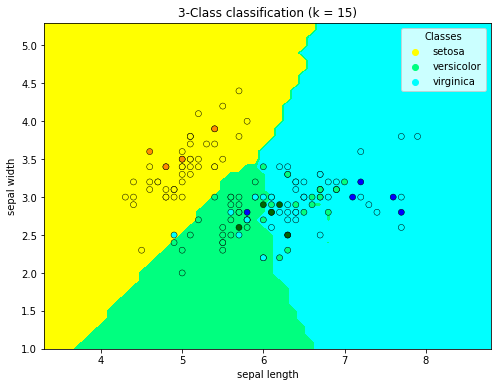

In [5]:
#Creacion de los valores limites de acuerdo a los ejes X Y
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

ss = .1  # separación entre cada combinación de cordenadas

#arreglos que describirán la cuadricula de acuerdo a los ejes X Y
xx, yy = np.meshgrid(np.arange(x_min, x_max, ss), np.arange(y_min, y_max, ss))

#arreglo que contiene la clase asignada a cada combinacion de cordenadas al relacionar xx y yy
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# mapas de colores a usar en la gráfica
cmap_train = ['yellow', 'springgreen', 'cyan']
cmap_predictions = ListedColormap(cmap_train)
cmap_test = ['darkorange', 'darkgreen', 'blue']

#se cambia la forma del arreglo Z para ser compatible a la hora de gráficar
Z = Z.reshape(xx.shape)

#personalización del tamaño de la figura a gráficar
plt.figure(figsize=(8, 6))

#coloreo del fondo de la gráfica de acuerdo a las clases
plt.contourf(xx, yy, Z, cmap=cmap_predictions)

# plasmar los datos de entrenamiento
ax = sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=classes[y_train], hue_order=classes,
                palette=cmap_train, edgecolor="black")

# Plasmar os datos de testeo 
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=classes[y_test], hue_order=classes,
                palette=cmap_test, edgecolor="black", legend=False)

#titulo para la "leyenda" que nombra las clases de acuerdo a los colores
ax.legend(title='Classes')

#plasmar la gráfica asignando los limites y etiquetas de los ejes
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()